In [458]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  
import statsmodels.api as sm
import statsmodels.formula.api as smf 
from scipy.stats import t as tdist 
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
from sklearn.cross_validation import ShuffleSplit
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import summary_table

get_ipython().magic(u'matplotlib inline')
from statsmodels.sandbox.regression.predstd import wls_prediction_std as pi
%matplotlib inline

In [459]:
os.getcwd()

'C:\\Users\\anumeha\\Downloads'

In [460]:
#Loading Boston Data
os.chdir("/Users/anumeha/Downloads/")
boston = pd.read_csv('data05_boston.csv')

In [461]:
boston.keys()

Index([u'crim', u'zn', u'indus', u'chas', u'nox', u'rm', u'age', u'dis',
       u'rad', u'tax', u'ptratio', u'black', u'lstat', u'medv'],
      dtype='object')

In [462]:
from sklearn.datasets import load_boston
boston = load_boston()
boston_df = pd.DataFrame(data = boston['data'], columns=boston['feature_names'])
target_df = pd.DataFrame(np.array(boston.target), columns=['lables'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [463]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [464]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


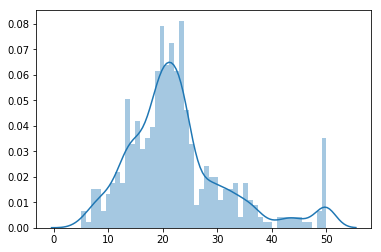

In [465]:
sns.distplot(target_df, bins = 50)

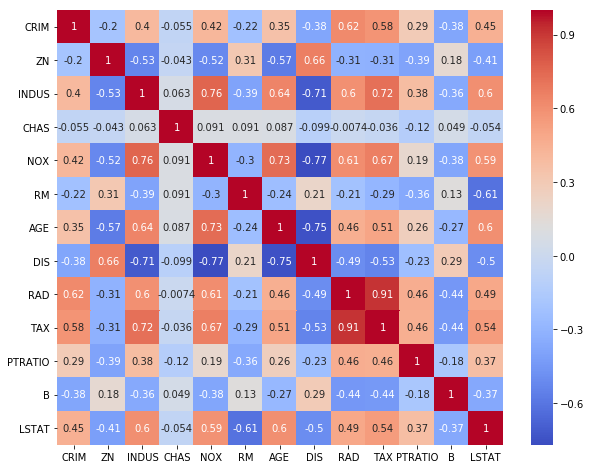

In [466]:
plt.figure(figsize = (10,8))
sns.heatmap(boston_df.corr(), annot = True, cmap = 'coolwarm')

In [467]:
# Minimum price of the data
minimum_price = np.min(target_df)

# Maximum price of the data
maximum_price = np.max(target_df)

# Mean price of the data
mean_price = np.mean(target_df)

# Median price of the data
median_price = np.median(target_df)

# Standard deviation of prices of the data
std_price = np.std(target_df)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(float(minimum_price))
print "Maximum price: ${:,.2f}".format(float(maximum_price))
print "Mean price: ${:,.2f}".format(float(mean_price))
print "Median price ${:,.2f}".format(float(median_price))
print "Standard deviation of prices: ${:,.2f}".format(float(std_price))

Statistics for Boston housing dataset:

Minimum price: $5.00
Maximum price: $50.00
Mean price: $22.53
Median price $21.20
Standard deviation of prices: $9.19


In [468]:
#Train Test Split
from sklearn.model_selection import train_test_split
boston_df.columns

Index([u'CRIM', u'ZN', u'INDUS', u'CHAS', u'NOX', u'RM', u'AGE', u'DIS',
       u'RAD', u'TAX', u'PTRATIO', u'B', u'LSTAT'],
      dtype='object')

In [469]:
X = boston_df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y = target_df

In [470]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

In [471]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [472]:
print(lm.intercept_)

[40.26605124]


In [473]:
predictions = lm.predict(X_test)

Text(0.5,1,'Predictions vs Actual Values - Test Set')

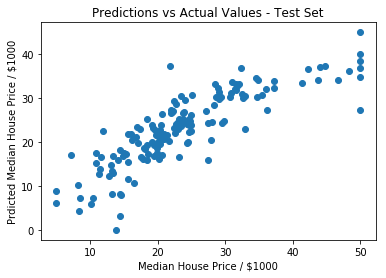

In [474]:
plt.scatter(y_test, predictions)
plt.xlabel("Median House Price / $1000")
plt.ylabel("Prdicted Median House Price / $1000")
plt.title("Predictions vs Actual Values - Test Set")

In [475]:
from sklearn import metrics

In [476]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

('MAE:', 3.8365281377278873)
('MSE:', 28.551148765669442)
('RMSE:', 5.3433274993836415)


In [477]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [478]:
predictions = lm.predict(X)
print(predictions)[0:5]

[[30.00821269]
 [25.0298606 ]
 [30.5702317 ]
 [28.60814055]
 [27.94288232]]


In [479]:
#Check which features are more correlated with the pricec
combined_data= pd.concat([boston_df, target_df], axis=1)
combined_data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,lables
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [480]:
#Eliminate bigger P value  Features
import statsmodels.formula.api as sm

In [481]:
regressor_OLS = sm.OLS(y, X).fit()

In [482]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lables   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     891.1
Date:                Fri, 12 Oct 2018   Prob (F-statistic):               0.00
Time:                        16:56:39   Log-Likelihood:                -1523.8
No. Observations:                 506   AIC:                             3074.
Df Residuals:                     493   BIC:                             3129.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0916      0.034     -2.675      0.008      -0.159      -0.024
ZN             0.0487      0.014      3.379      0.001       0.020       0.077
INDUS         -0.0038      0.064     -0.059      0.953      -0.130       0.123
CHAS           2.8564      0.904      3.160      0.002       1.080       4.633
NOX           -2.8808      3.359     -0.858      0.392      -9.481       3.720
RM             5.9252      0.309     19.168      0.000       5.318       6.533
AGE           -0.0072      0.014     -0.523      0.601      -0.034       0.020
DIS           -0.9680      0.196     -4.947      0.000      -1.352      -0.584
RAD            0.1704      0.067      2.554      0.011       0.039       0.302
TAX           -0.0094      0.004     -2.393      0.017      -0.017      -0.002
PTRATIO       -0.3924      0.110     -3.571      0.000      -0.608      -0.177
B              0.0150      0.003      5.561      0.000       0.010       0.020
LSTAT         -0.4170      0.051     -8.214      0.000      -0.517      -0.317
==============================================================================
Omnibus:                      204.050   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1372.527
Skew:                           1.609   Prob(JB):                    9.11e-299
Kurtosis:                      10.399   Cond. No.                     8.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [483]:
#eliminating some independent variables
def backward_elimination(x, y, sig_limit):
    num_vars = len(x.columns)
    for i in range(0, num_vars):
        regressor_OLS = sm.OLS(y, x).fit()
        max_var = max(regressor_OLS.pvalues)
        if max_var > sig_limit:
            for j in range(0, num_vars - i):
                if (regressor_OLS.pvalues[j] == max_var):
                    x = x.drop(x.columns[[j]], axis=1) 
    return x

In [484]:
optimised_features = backward_elimination(X, y, 0.05)
optimised_features.head()

,CRIM,ZN,CHAS,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,0.0,6.575,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,0.0,6.421,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,0.0,7.185,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,0.0,6.998,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,0.0,7.147,6.0622,3.0,222.0,18.7,396.90,5.33


In [485]:
optimised_regressor = sm.OLS(y, optimised_features).fit()

In [486]:
optimised_regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lables   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     1162.
Date:                Fri, 12 Oct 2018   Prob (F-statistic):               0.00
Time:                        16:56:41   Log-Likelihood:                -1524.6
No. Observations:                 506   AIC:                             3069.
Df Residuals:                     496   BIC:                             3111.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0898      0.034     -2.630      0.009      -0.157      -0.023
ZN             0.0512      0.014      3.630      0.000       0.024       0.079
CHAS           2.7212      0.892      3.052      0.002       0.970       4.473
RM             5.7113      0.245     23.353      0.000       5.231       6.192
DIS           -0.8664      0.167     -5.185      0.000      -1.195      -0.538
RAD            0.1820      0.063      2.867      0.004       0.057       0.307
TAX           -0.0109      0.003     -3.292      0.001      -0.017      -0.004
PTRATIO       -0.4004      0.109     -3.682      0.000      -0.614      -0.187
B              0.0146      0.003      5.475      0.000       0.009       0.020
LSTAT         -0.4499      0.042    -10.596      0.000      -0.533      -0.366
==============================================================================
Omnibus:                      198.034   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1249.000
Skew:                           1.575   Prob(JB):                    6.07e-272
Kurtosis:                      10.022   Cond. No.                     2.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [487]:
#New Model with three most influencing variables

In [488]:
a1 = boston_df[[ 'RM', 'PTRATIO', 'LSTAT']]
y = target_df

In [491]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(a1,y)

In [492]:
predictions = lm.predict(a1)
print(predictions)[0:5]

[[31.16835679]
 [25.76746391]
 [32.13917258]
 [31.08040676]
 [30.38658889]]


In [493]:
#Rsq score
lm.score(a1,y)

0.678624160161311

In [494]:
lm.coef_

array([[ 4.51542094, -0.93072256, -0.57180569]])

In [495]:
lm.intercept_

array([18.56711151])

In [496]:
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))

('MAE:', 3.6417936968390814)
('MSE:', 27.130405758497066)
('RMSE:', 5.20868560756906)


In [497]:
from sklearn.cross_validation import train_test_split
# TODO: Shuffle and split the data into training and testing subsets
a1_train, a1_test, y_train, y_test = train_test_split(a1, y, test_size=.20, random_state=25)
# Success
print ("Training and testing split was successful.")

Training and testing split was successful.


In [498]:
from sklearn.linear_model import LinearRegression
lm1 = LinearRegression()
lm1.fit(a1_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [499]:
#Normalizing trained Data
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
scaler.fit(a1_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [500]:
#Make a1_train to be the Scaled version of the Data
a1_train=pd.DataFrame(data=scaler.transform(a1_train), columns=a1_train.columns, index=a1_train.index)
print(a1_train)

           RM   PTRATIO     LSTAT
115 -0.538341 -0.266866  0.423387
310 -1.867034  0.000220 -0.003963
425 -0.582862  0.801481  1.605448
430  0.046006  0.801481  0.680893
390 -0.837471  0.801481  0.608298
3    0.950352  0.133764 -1.332584
233  2.688088 -0.444924 -1.194243
247 -0.123733  0.311822 -0.345022
411  0.475918  0.801481  1.171250
169  0.121136 -1.646815 -0.184765
361 -0.088950  0.801481  0.208342
492 -0.461819  0.756966  0.093286
4    1.157656  0.133764 -1.005223
180  2.017480 -0.266866 -0.699777
63   0.622005  0.578909 -0.434053
97   2.440436 -0.177838 -1.158631
350  0.243571  0.578909 -0.916192
73  -0.097298  0.356336 -0.702516
150 -0.268428 -1.646815  0.196015
395  0.217136  0.801481  0.609668
285  0.192093 -1.379728 -0.608006
133 -0.685819  1.246626  0.323398
308  0.445309  0.000220 -1.113430
296  0.325658 -1.068127 -0.723062
153 -0.843036 -1.646815  0.427496
112 -0.559210 -0.266866  0.485024
100  0.573309  1.113082 -0.445011
161  1.633481 -1.646815 -1.498319
490 -1.700077 

In [501]:
#Normalizing the test data
scal = StandardScaler()
scal.fit(a1_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [502]:
#Make a1_test to be the Scaled version of the Data
a1_test=pd.DataFrame(data=scaler.transform(a1_test), columns=a1_test.columns, index=a1_test.index)
print(a1_test)

           RM   PTRATIO     LSTAT
125 -0.457645  0.311822  0.293264
486 -0.279559  0.801481  0.316549
324  0.139223  0.534394 -0.897016
386 -2.313641  0.801481  2.138266
459 -0.325472  0.801481  0.278197
213  0.083571  0.089249 -0.450489
274  0.616440 -0.355895 -1.251771
491 -0.461819  0.756966  0.739790
429  0.090528  0.801481  1.562987
273  1.914524  0.089249 -0.834009
23  -0.698340  1.157597  0.987708
140 -0.196081  1.246626  1.573945
61  -0.485471  0.578909  0.242585
358 -0.261472  0.801481 -0.162850
279  0.691570 -1.557786 -1.070969
37  -0.646862  0.356336 -0.534042
95   0.431396 -0.177838 -0.824421
384 -2.708771  0.801481  2.460149
405 -0.879210  0.801481  1.412319
250  0.239397  0.311822 -0.927149
6   -0.421471 -1.424243 -0.032727
435  0.436962  0.801481  1.452040
223  0.421657 -0.444924 -0.694298
503  0.919743  1.157597 -0.962762
372 -0.612080  0.801481 -0.518975
480 -0.101472  0.801481 -0.264209
282  1.850524 -1.557786 -1.322996
38  -0.485471  0.356336 -0.347761
329  0.025136 

In [519]:
#Convert to Numpy arrays
a1_train = np.array(a1_train)
y_train = np.array(y_train)
type(a1_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [520]:
a1_test = np.array(a1_test)
y_test = np.array(y_test)
type(a1_test), type(y_test)

(numpy.ndarray, numpy.ndarray)

In [521]:
#Fitting a model
#Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(a1, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit( a1.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)
    print (cv_sets)
    
    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state =0)
    
    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': list(range(1,11))}
    
    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)
    
    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(a1, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [522]:
# Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

In [523]:
# Fit the training data to the model using grid search
reg = fit_model(a1_train, y_train)

# Produce the value for 'max_depth'
print ("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

ShuffleSplit(404, n_iter=10, test_size=0.2, random_state=0)
Parameter 'max_depth' is 3 for the optimal model.


In [524]:
# Predicting the Test set results
Y_Pred = regressor.predict(a1_test)

In [526]:
regressor_OLS = sm.OLS(y, a1).fit()

In [527]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lables   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     3335.
Date:                Fri, 12 Oct 2018   Prob (F-statistic):               0.00
Time:                        17:04:05   Log-Likelihood:                -1564.1
No. Observations:                 506   AIC:                             3134.
Df Residuals:                     503   BIC:                             3147.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             6.2433      0.225     27.692      0.000       5.800       6.686
PTRATIO       -0.5714      0.092     -6.215      0.000      -0.752      -0.391
LSTAT         -0.4919      0.040    -12.439      0.000      -0.570      -0.414
==============================================================================
Omnibus:                      196.409   Durbin-Watson:                   0.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1133.974
Skew:                           1.593   Prob(JB):                    5.76e-247
Kurtosis:                       9.606   Cond. No.                         24.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [556]:
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))

('MAE:', 3.6417936968390814)
('MSE:', 27.130405758497066)
('RMSE:', 5.20868560756906)


In [554]:
print( "Estimated intercept coeff: ", lm1.intercept_ )
print( "Number of coeffs: ", len( lm1.coef_ ))
print( "Coeffs = ", lm1.coef_ )

('Estimated intercept coeff: ', array([13.94476603]))
('Number of coeffs: ', 1)
('Coeffs = ', array([[ 5.15620612, -0.93582444, -0.5237359 ]]))


In [553]:
lm1.predict( a1)[0:10]

array([[30.92050253],
       [25.60814433],
       [32.22377628],
       [30.98819588],
       [30.50474177],
       [26.8705903 ],
       [24.20930844],
       [21.51479614],
       [13.07941558],
       [21.72221212]])

In [551]:
mse = np.mean( (y-lm.predict(a1))**2)
print( "Mean squared error = ", mse )

('Mean squared error = ', lables    27.130406
dtype: float64)


Text(0,0.5,'Residuals')

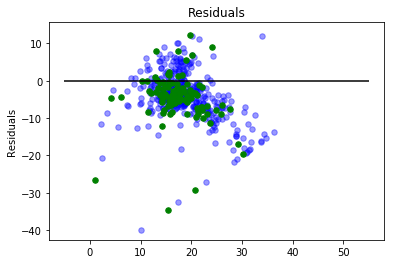

In [552]:
plt.scatter( lm.predict(a1_train), lm.predict(a1_train) - y_train,
c ='b', s=30, alpha=0.4 )
plt.scatter( lm.predict(a1_test), lm.predict(a1_test) - y_test,
c ='g', s=30 )
plt.hlines( y=0, xmin=-5, xmax=55)
plt.title( "Residuals" )
plt.ylabel( "Residuals" )